In [1]:
import random
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
def cost(treatment):
    return random.random()

def benefit(treatment):
    return random.random()

def score(schedule):
    cost_sum = sum(cost(treatment) for treatment in schedule)
    benefit_sum = sum(benefit(treatment) for treatment in schedule)
    return cost_sum, benefit_sum

def score_total(cost, benefit):
    return benefit - cost

In [33]:
# Start the stopwatch
start_time = time.time()

all_treatments = [(dose, period) for dose in [0,1,2] for period in [0,1,2]]

all_schedules = [(t1, t2, t3, t4) for t1 in all_treatments for t2 in all_treatments for t3 in all_treatments for t4 in all_treatments]

scored_schedules = [(*schedule, *score(schedule)) for schedule in all_schedules]

best_schedule = max(scored_schedules, key=lambda x: score_total(x[-2], x[-1]))

# Stop the stopwatch
end_time = time.time()

elapsed_time = end_time - start_time

print(f"Tested {len(scored_schedules)} treatment schedules.")
print(f"Elapsed Time: {elapsed_time} seconds")
print(f"Best schedule:\n{best_schedule[0:4]}\nCost: {best_schedule[-2]}\nBenefit: {best_schedule[-1]}")

Tested 6561 treatment schedules.
Elapsed Time: 0.06473827362060547 seconds
Best schedule:
(2, 2, 2, 1, 2, 1, 0, 0)
Cost: 0.27724033353676725
Benefit: 3.062357850060965


In [29]:
treatment_list = pd.DataFrame(scored_schedules, columns = ["t1", "t2", "t3", "t4", "cost", "benefit"])
treatment_list.head()

,t1,t2,t3,t4,cost,benefit
0,"(0, 0)","(0, 0)","(0, 0)","(0, 0)",2.139132,2.328477
1,"(0, 0)","(0, 0)","(0, 0)","(0, 1)",2.771345,2.716979
2,"(0, 0)","(0, 0)","(0, 0)","(0, 2)",2.318028,1.035836
3,"(0, 0)","(0, 0)","(0, 0)","(1, 0)",1.328188,1.921994
4,"(0, 0)","(0, 0)","(0, 0)","(1, 1)",1.998287,2.397383


Text(0.5, 1.0, 'Cost vs Benefit for All Treatment Schedules')

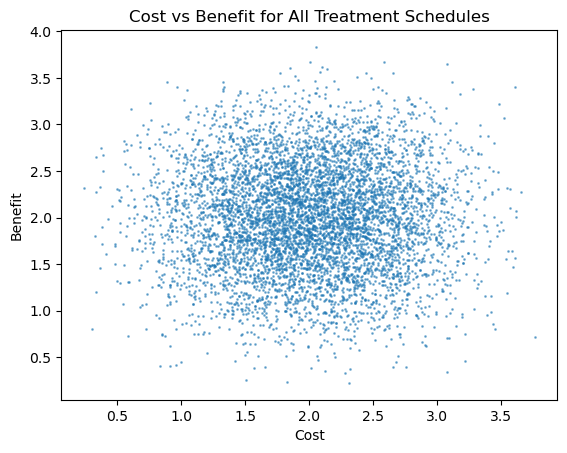

In [27]:
plt.scatter(treatment_list["cost"], treatment_list["benefit"], s=1, alpha=0.5)
plt.xlabel("Cost")
plt.ylabel("Benefit")
plt.title("Cost vs Benefit for All Treatment Schedules")